# Lista 1 - Finanças Quantitativas e Gerenciamento de Risco

### Vinicius Julião Ramos - 2018054630


## Questão 1

In [1]:
q1_preco_atual = 100
q1_preco_menor = 95
q1_preco_maior = 95
q1_preco_opcao = 1.49
q1_preco_exercicio_opcao = 102

a) Sim eu compraria a ação. Observe que o preço de exercício da opção é de R\\$102,00 e o preço da opção em si é de R\\$1,49. Com isso, se a o preço da ação cair para R\\$95 eu não executaria a minha ordem de compra, como há 50\% de chance do preço chegar nesse valor, eu tenho tal chance de perder os R\\$1,49 do preço da opção.\
Entretanto, como há 50\% de chance do preço chegar em R\\$105,00, caso isso ocorra e eu execute a ordem, eu ganharei R\\$3,00. Portanto, considerando o gasto que tive com a compra da opção, terei um lucro de $3 - 1.49 = 1.51$.\
Ou seja, tenho 50\% de chance de perder R\\$1,49 e mais 50\% de chances de ganhar R\\$1,51. Portanto eu compraria  a opção.

In [2]:
q1_tlr = 0.01 #taxa livre de risco
q1_invst_livre_risco = q1_preco_opcao * (1+q1_tlr)
print(q1_invst_livre_risco)

1.5049


b) Sim, minha decisão mudaria. Observando o caso anterior, como há 50\% de chance de ganhar R\\$1,51 e 50\% de chances de perder R\\$1,49, na média entre lucro e prejuízo ganhamos R\\$0,01 para os R\\$1,49 investidos.\
Porém, como a taxa livre de risco é de 1\%, temos que investir R\\$1,49 dá um retorno de R\\$0,0149, que é maior do que o retorno "médio" do investimento em opções.\
Por este caso eu mudaria minha decisão.

## Questão 2

a) Tomando $w$ como a proporção do valor total investido. Podemos calcular o valor esperado de forma que:

$$
E = \frac{15}{30}(1-w) + \frac{14}{30}(1-\frac{w}{2}) + \frac{1}{30}(1+49) - 1 = 0.9w
$$

Portanto, com esse valor de retorno esperado, o ideal será investir 100\% de M.

b) Perderá tudo: independentemente de quantas vezes a bolinha parou em números ímpares ou então até mesmo no número correto, basta que caia em uma casas de número par para perder tudo. Após tal perda não é possível jogar novamente.

c) Para tal calculo, utilizaremos a média geométrica, uma vez que aqui o fator do tempo é considerado. Ou seja, o fato de sair um número par é considerado e assim, obtemos uma proporção adequada para apostar e correr o risco da perda de tal proporção do valor total investido.

A média geométrica é dada por:
$$
G = \sqrt[30]{(1-w)^{15} \times (1 - \frac{w}{2})^{14} \times (1+49w)} - 1
$$

In [3]:
import numpy as np

def g_(w):
    return (((1-w)**15)*((1-(w/2))**14)*(1+(49*w)))**(1/30)-1

test_range = np.linspace(0,1,10000)
rs = [g_(i) for i in test_range]
index = np.argmax(rs)
print("Maximo G:", rs[index])
print("Ocorre para w = :", test_range[index])

Maximo G: 0.008169377171570957
Ocorre para w = : 0.024102410241024105


c) \[CONTINUACAO\] Portanto, para temos a proporção de $M$ a ser investida deve ser de cerca de 2,41\%.

## Questão 3

In [4]:
import pandas as pd
import io
import requests
url_diario="./IBOV.csv"
url_mensal="./IBOVmensal.csv"
ibov_diario=pd.read_csv(url_diario)

def df_by_date(df, begin, end):
    df = df[(df.Date >= begin) & (df.Date < end)]
    df = df.T
    df.columns = df.iloc[0]
    df = df.drop('Date')
    return df

In [5]:
# a)

def correlacao(df):
    acc = len(df.index)
    
    ret = pd.DataFrame(index = df.index)
    for i in range(len(df.columns) - 1):
        ret[i] = (df.iloc[:, i+1] - df.iloc[:, i]) / df.iloc[:, i]
    
    correlation = np.zeros(acc - 1)
    for i in range(acc-1):
        correlation[i] = np.corrcoef(ret.loc['IBOV'], ret.iloc[i+1])[0][1]
    return correlation

corr19 = correlacao(df_by_date(ibov_diario, 20190000, 20200103))
itub4 = "{:.4f}".format(corr19[41])
print("a)")
print(f"Correlação de ITUB4: {itub4}")
print(f"Correlação média: {np.mean(corr19)}")
print(f"Correlação mínima: {np.min(corr19)}")

a)
Correlação de ITUB4: 0.7412
Correlação média: 0.506549510294997
Correlação mínima: 0.16978287446585813


In [6]:
corr20 = correlacao(df_by_date(ibov_diario, 20200000, 20210103))
print("b)")
print(f"Correlação média: {np.mean(corr20)}")
print(f"Correlação mínima: {np.min(corr20)}")

b)
Correlação média: 0.7695246273268775
Correlação mínima: 0.35035344921637007


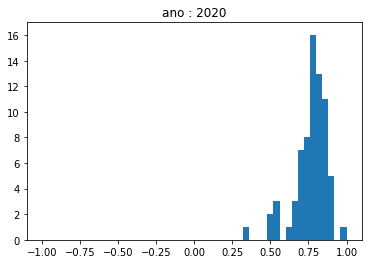

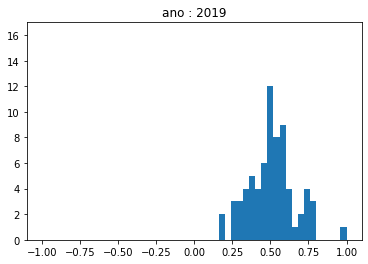

In [7]:
import matplotlib.pyplot as plt
plt.hist(corr20, range = (-1, 1), bins = 50)
plt.title("ano : 2020")
plt.ylim([0, 17])
plt.show()

plt.hist(corr19, range = (-1, 1), bins = 50)
plt.title("ano : 2019")
plt.ylim([0, 17])
plt.show()

c) pode-se afirmar que BOVA11 é um bom índice, e que em 2019 houveram menos correlaçõe se comparado com o ano de 2020. Uma possível explicação são as notícias sobre a macro economia que afeta o mercado de maneira uniforme, ou seja, uma crise global.\
Também é possivel observar a inexistência de correlações negativas em ambos os anos.

## Questão 4

In [8]:
from scipy.stats import skew, kurtosis

ibov_diario = pd.read_csv('./IBOV.csv')
lt_year = ibov_diario[-251:]
lt_year = lt_year.filter(['Date', 'BOVA11', 'PETR4', 'ABEV3', 'SUZB3', 'ITSA4'])
lt_year = df_by_date(lt_year, 20190000, 20220000)

ret = pd.DataFrame(index = lt_year.index)
for i in range(len(lt_year.columns) - 1):
    ret[i] = (lt_year.iloc[:, i+1] - lt_year.iloc[:, i]) / lt_year.iloc[:, i]

answer = pd.DataFrame(columns=['Expected return', 'Std. deviation', 'Skewness', 'Kurtosis', 'VaR 5%'],
                      index=['BOVA11', 'PETR4', 'ABEV3', 'SUZB3', 'ITSA4','Portfolio'])

ret.loc['Portfolio'] = np.mean(ret)
answer.iloc[:, 0] = np.mean(ret.T)
answer.iloc[:, 1] = np.std(ret.T)

for i in range(6):
    answer.iloc[i,2] = skew(ret.iloc[i])
    answer.iloc[i,3] = kurtosis(ret.iloc[i]) + 3
    answer.iloc[i,4] = np.sort(ret.iloc[i])[13]
    
answer

,Expected return,Std. deviation,Skewness,Kurtosis,VaR 5%
BOVA11,0.000441,0.026923,-1.05417,13.351,-0.0364041
PETR4,0.000584,0.041346,-1.45044,19.3625,-0.0373832
ABEV3,-0.001269,0.026764,-0.909621,10.3956,-0.039604
SUZB3,0.002291,0.034222,-0.0841769,7.75604,-0.047619
ITSA4,-0.000191,0.026654,-0.345143,5.86184,-0.0447059
Portfolio,0.000371,0.024611,-1.65793,15.5629,-0.0279362


- Ao calcular o VaR você verá que a resposta não é tão óbvia.  Explique como você definiu o valor a ser utilizado.\
  Inicialmente os retornos foram ordenados de acordo com os ativos, então realizer 259/12 = 12.5, porém queria a borda superior, logo obtive o indice 13 (que seria o 14o elemento, uma vez que os indeices contam a partir de 0).\
  Finalmente, obtive que 95\% dos retornos do ultimo ano foram acima do elemento selecionado, e consequentemente, 5\% dos retornos estão abaixo.

- O que os valores da curtose sugerem.\
  Podemos sugerir que existe uma cauda pesada em todos os valores, uma vez que estes foram acima de 5\%. Assim, concluímos que as ações foram muito voláteis no período em questão.

- Como o portfolio se compara com o ativos individuais em relação ao risco esperado.\
  Ao comparar os ativos individualmente com todo o portifólio, temos uma VaR de 5\% menor para o portifólio. Isso sugere um menor risco em relação a um investimeno mono ativo. Ademais, temos um bom retorno esperado e um desvio padrão menor em comparação com os restantes.